# Harris operator 

Commonly, Harris corner detector algorithm can be divided into five steps.

1. Color to grayscale

2. Spatial derivative calculation

3. Structure tensor setup

4. Harris response calculation

5. Non-maximum suppression

#### an improvement we found about during implementation was applying a box/gaussian filter over spatial derivatives and smoothing the image before calculations which allows us to detect corners in a neighborhood instead of single pixels and the blurring helps us avoid noise.  

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import cv2 as cv
from scipy import linalg

## Implementation

In [7]:
def harrisoperator(img,window=5,k=0.05,q=0.999):
    """"" inputs are the image , the blocksize used for detection (neighborhood size), k is a constant used in
                R score calculations (recommended value is between 0.04:0.06 , quantile percent for non maximum supression) """
    
    """""returns a boolean matrix of the same size as the input image, with the points of interest (corners) masked with the true and the rest is False """"" 
    
    
    # first convert to grayscale if RGB
    if len(img)>=3:
        img= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        
    # smooth the image (optional)
    img= cv.GaussianBlur(img,(5,5),0)
        
    
    # find gradients by sobel derivative 
    
    sobelx = np.array([[ -1 , 0 , 1 ] ,
                    [ -2 , 0 , 2 ] ,
                    [ -1 , 0 , 1 ]])
    sobely = sobelx.transpose()
    
    # spatial derivatives
    
    ix=signal.convolve2d( img , sobelx ,'same') 
    iy=signal.convolve2d( img , sobely ,'same') 
    
    # calculate structure tensor elements 
    ixx=np.multiply( ix, ix) # squared ix
    iyy=np.multiply( iy, iy) # squared iy 
    ixy=np.multiply( ix, iy) # ix * iy
    
    #apply a box window over spatial derivatives to be able to detect larger corner in a neighbor hood instead of a single pixel
    ixx=cv.blur(ixx,(window,window))
    iyy=cv.blur(iyy,(window,window))
    ixy=cv.blur(ixy,(window,window))
    
    # matrix calculations and R score 
    
    detm=  np.multiply(ixx,iyy) - np.multiply(ixy,ixy) 
    trace= ixx+iyy 
    r=   detm - k * trace**2
    #print (r.shape)
    
    # non maximum suppresion
    corners = np.abs(r) >  np.quantile( np.abs(r),q)
    
    return corners
    
    

### Now we will test our implementation and compute the running time over some pictures 

In [40]:
# load images 
img1= cv.imread(r"C:\Users\Mohamed Salman\Desktop\Mohamed Salman\SBME 3rd year\Second Semester\computervision\tasks\task3\box.jpg", cv.IMREAD_COLOR)
img2= cv.imread(r"C:\Users\Mohamed Salman\Desktop\Mohamed Salman\SBME 3rd year\Second Semester\computervision\tasks\task3\images.png", cv.IMREAD_COLOR)
img3= cv.imread(r"C:\Users\Mohamed Salman\Desktop\Mohamed Salman\SBME 3rd year\Second Semester\computervision\tasks\task3\5a7b2735a5f4769505750210daa4aaedbeb1abc8.png", cv.IMREAD_COLOR)
img4= cv.imread(r"C:\Users\Mohamed Salman\Desktop\Mohamed Salman\SBME 3rd year\Second Semester\computervision\tasks\task3\Rectangles.png", cv.IMREAD_COLOR)
img5=cv.imread(r"C:\Users\Mohamed Salman\Desktop\Mohamed Salman\SBME 3rd year\Second Semester\computervision\tasks\task3\Screenshot 2023-04-11 202052.png",1)
img6=cv.imread(r"C:\Users\Mohamed Salman\Desktop\Mohamed Salman\SBME 3rd year\Second Semester\computervision\tasks\task3\input_0.png",1)



the running time for an image of shape (353, 454) is 0.05 ms


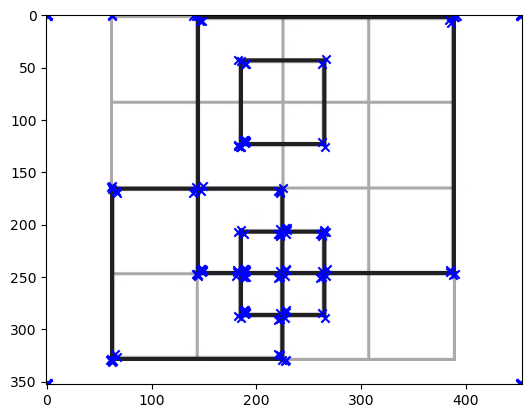

In [65]:
import time 
t1=time.time()
corner1=harrisoperator(img1,window=3,q=0.999,k=0.06)
t2=time.time()
print("the running time for an image of shape",corner1.shape,"is", round(t2-t1,2),"ms" )
plt.imshow(img1,zorder=1)
    
corners_pos = np.argwhere(corner1)
    
plt.scatter(corners_pos[:,1],corners_pos[:,0],zorder=2, c = 'b',marker ='x')

the running time for an image of shape (194, 259) is 0.02 ms


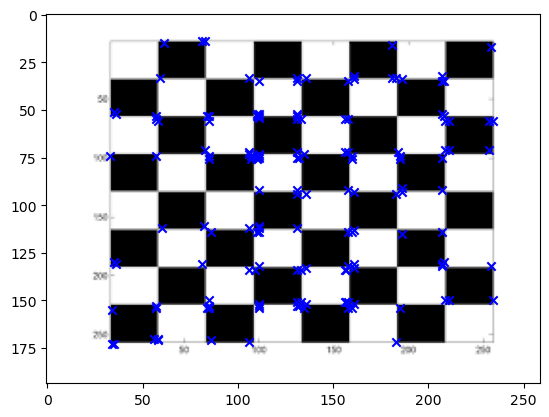

In [67]:

t1=time.time()
corner2=harrisoperator(img2,window=3,q=0.997,k=0.06)
t2=time.time()
print("the running time for an image of shape",corner2.shape,"is", round(t2-t1,2),"ms" )
plt.imshow(img2,zorder=1)
    
corners_pos = np.argwhere(corner2)
    
plt.scatter(corners_pos[:,1],corners_pos[:,0],zorder=2, c = 'b',marker ='x')

the running time for an image of shape (200, 256) is 0.03 ms


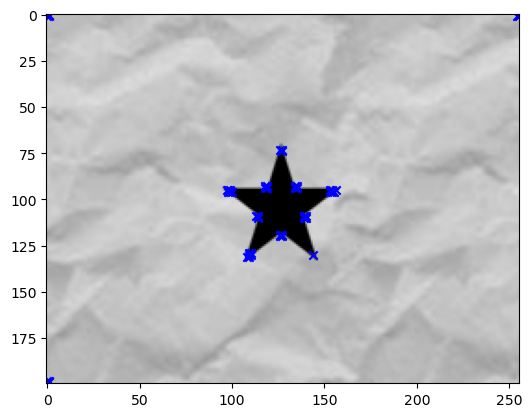

In [68]:
t1=time.time()
corner3=harrisoperator(img3,window=3,q=0.999,k=0.06)
t2=time.time()
print("the running time for an image of shape",corner3.shape,"is", round(t2-t1,2),"ms" )

plt.imshow(img3,zorder=1)
    
corners_pos = np.argwhere(corner3)
    
plt.scatter(corners_pos[:,1],corners_pos[:,0],zorder=2, c = 'b',marker ='x')

the running time for an image of shape (447, 728) is 0.08 ms


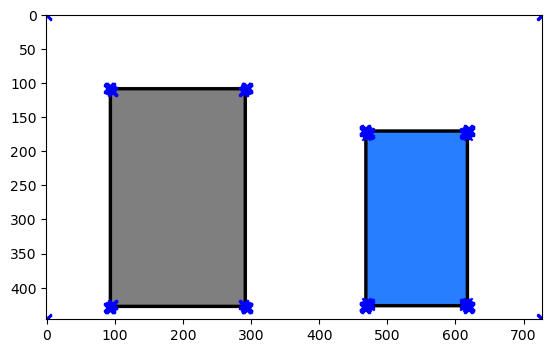

In [69]:
t1=time.time()
corner4=harrisoperator(img4,window=3,q=0.999,k=0.06)
t2=time.time()
print("the running time for an image of shape",corner4.shape,"is", round(t2-t1,2),"ms" )
plt.imshow(img4,zorder=1)
    
corners_pos = np.argwhere(corner4)
    
plt.scatter(corners_pos[:,1],corners_pos[:,0],zorder=2, c = 'b',marker ='x')

the running time for an image of shape (836, 835) is 0.16 ms


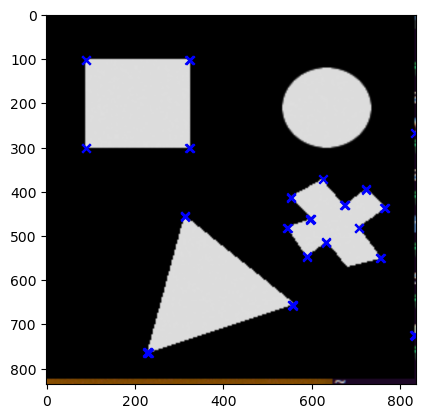

In [70]:
t1=time.time()
corner5=harrisoperator(img5,window=5,q=0.9999,k=0.05) # high non maximum supression because the blurry edges of the triangle are seen as corners
t2=time.time()
print("the running time for an image of shape",corner5.shape,"is", round(t2-t1,2),"ms" )
plt.imshow(img5,zorder=1)
    
corners_pos = np.argwhere(corner5)
    
plt.scatter(corners_pos[:,1],corners_pos[:,0],zorder=2, c = 'b',marker ='x')

the running time for an image of shape (960, 1280) is 0.22 ms


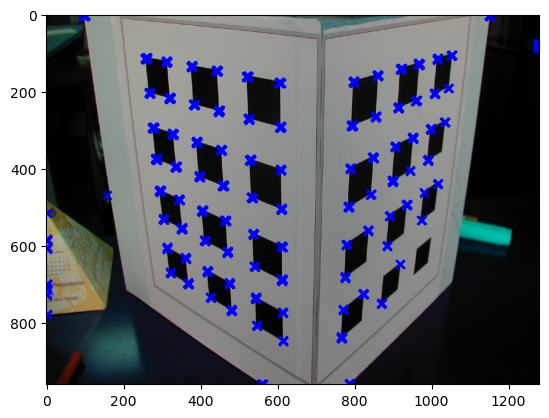

In [71]:

t1=time.time()
corner6=harrisoperator(img6,window=5,q=0.999,k=0.06) 
t2=time.time()
print("the running time for an image of shape",corner6.shape,"is", round(t2-t1,2),"ms" )
plt.imshow(img6,zorder=1)
    
corners_pos = np.argwhere(corner6)
    
plt.scatter(corners_pos[:,1],corners_pos[:,0],zorder=2, c = 'b',marker ='x')

In [72]:
%%html
<style>
table {float:left}
</style>

## Here we can see that the algorithm does well for identfying corners and the performance can be improved by tuning the hyper parameters 

### below is the computation time for different image sizes


| image size | Running time |
| :--- | :--- |
| (353, 454)   | 0.05 s |
| (836, 835) | 0.16 s |
| (960, 1280)   | 0.22 s |
| (447, 728)  | 0.08 s  |
| (200, 256) |  0.03 s|
| (194, 259) | 0.02 s |


 


 #### we can see that the computations are extermely fast and that is because the harris operator uses an approximation to calculate the R score which allowed us to avoid making the sqrt calculations and we were also able to use Matrix operations and numpy arrays which are 30 times faster than normal lists

# The $\lambda-$ Operator 

it can be thought of as a variant of the harris operator but it is much more computationally expensive because of the square root calculations. 

Here is what we do:  

1. Color to grayscale

2. Spatial derivative calculation

3. Create the H matrix from gradient entries

4. compute the eigen values for each pixel

5. Non-maximum suppression // we can also use local thresholding to choose our points 

### once again we apply smoothing and box filter windows over the image and gradients to improve the results



## Implementation

In [75]:
def lambdamin(img,window=3,q=0.999):
    
    """"" inputs are the image , the blocksize used for detection (neighborhood size), quantile percent for non maximum supression) """
    
    """""returns a boolean matrix of the same size as the input image, with the points of interest (corners) masked with the true and the rest is False """"" 
    
    
    
    # first convert to grayscale if RGB
    if len(img)>=3:
        img= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        
    # smooth the image 
    img= cv.GaussianBlur(img,(5,5),0)
        
    
    # find gradients by sobel derivative 
    
    sobelx = np.array([[ -1 , 0 , 1 ] ,
                    [ -2 , 0 , 2 ] ,
                    [ -1 , 0 , 1 ]])
    sobely = sobelx.transpose()
    
    # spatial derivatives
    
    ix=signal.convolve2d( img , sobelx ,'same') 
    iy=signal.convolve2d( img , sobely ,'same') 
    
    # calculate structure tensor elements 
    ixx=np.multiply( ix, ix) # squared ix
    iyy=np.multiply( iy, iy) # squared iy 
    ixy=np.multiply( ix, iy) # ix . iy
    
    # improve performance by applying a window
    
    ixx=cv.blur(ixx,(window,window))
    iyy=cv.blur(iyy,(window,window))
    ixy=cv.blur(ixy,(window,window))
    
    # get H matrix for each element and find lambda min
    rows,cols= img.shape
    lambdamat=np.zeros_like(img)
    for i in range (rows):
        for j in range (cols):
            H=[[ixx[i,j],ixy[i,j]],[ixy[i,j],iyy[i,j]]]
            #print(H)
            eigvals=linalg.eigvals(H)
            try: 
                lambdamin= np.min(eigvals[np.nonzero(eigvals)]) # to avoid getting 0 as eigen value for all pixels
            except :
                lambdamin=0  # when both are zero we set it to zero
                
                
            lambdamat[i,j]=lambdamin
            
    # apply non maximal supression to get the highest lambda values
    
    lambdamat=np.abs(lambdamat) >  np.quantile( np.abs(lambdamat),q)

            
               
            

    
    return lambdamat
    
    

### Now we will test our implementation and compute the running time over some pictures 

C:\Users\Mohamed Salman\AppData\Local\Temp\ipykernel_13940\3074337019.py:54: ComplexWarning: Casting complex values to real discards the imaginary part
  lambdamat[i,j]=lambdamin


the running time for an image of shape (353, 454) is 6.17 ms


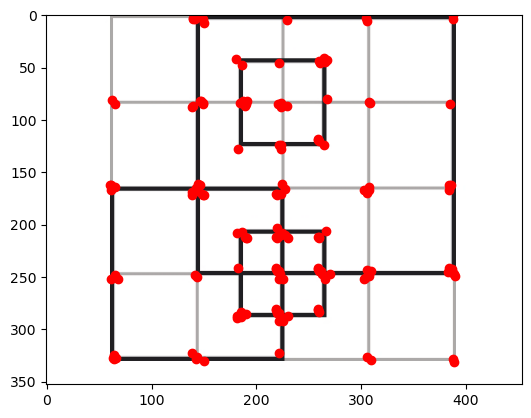

In [130]:
t1=time.time()
corner1=lambdamin(img1,window=3,q=0.999)
t2=time.time()
print("the running time for an image of shape",corner1.shape,"is", round(t2-t1,2),"ms" )
plt.imshow(img1,zorder=1)
    
corners_pos = np.argwhere(corner1)
    
plt.scatter(corners_pos[:,1],corners_pos[:,0],zorder=2, c = 'r',marker ='o')

C:\Users\Mohamed Salman\AppData\Local\Temp\ipykernel_13940\3074337019.py:54: ComplexWarning: Casting complex values to real discards the imaginary part
  lambdamat[i,j]=lambdamin


the running time for an image of shape (194, 259) is 2.02 ms


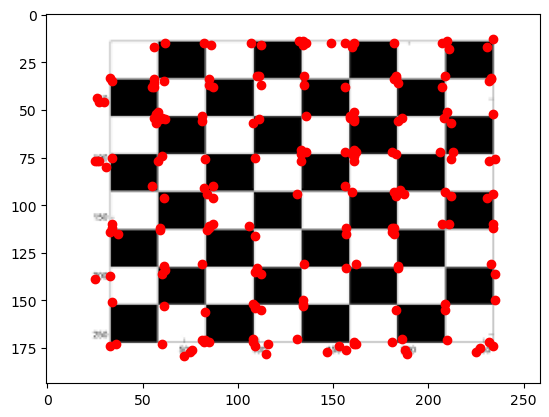

In [131]:
t1=time.time()
corner2=lambdamin(img2,window=2,q=0.996)
t2=time.time()
print("the running time for an image of shape",corner2.shape,"is", round(t2-t1,2),"ms" )
plt.imshow(img2,zorder=1)
    
corners_pos = np.argwhere(corner2)
    
plt.scatter(corners_pos[:,1],corners_pos[:,0],zorder=2, c = 'r',marker ='o')

C:\Users\Mohamed Salman\AppData\Local\Temp\ipykernel_13940\3074337019.py:54: ComplexWarning: Casting complex values to real discards the imaginary part
  lambdamat[i,j]=lambdamin


the running time for an image of shape (200, 256) is 2.16 ms


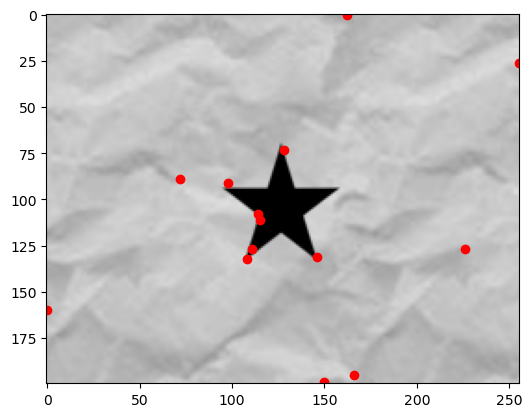

In [132]:
t1=time.time()
corner3=lambdamin(img3,window=3,q=0.9997)
t2=time.time()
print("the running time for an image of shape",corner3.shape,"is", round(t2-t1,2),"ms" )
plt.imshow(img3,zorder=1)
    
corners_pos = np.argwhere(corner3)
    
plt.scatter(corners_pos[:,1],corners_pos[:,0],zorder=2, c = 'r',marker ='o')

C:\Users\Mohamed Salman\AppData\Local\Temp\ipykernel_13940\3074337019.py:54: ComplexWarning: Casting complex values to real discards the imaginary part
  lambdamat[i,j]=lambdamin


the running time for an image of shape (447, 728) is 11.93 ms


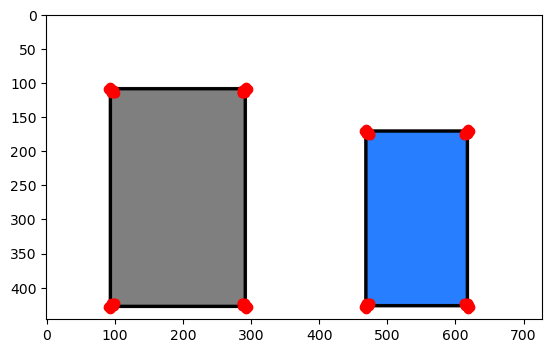

In [133]:
t1=time.time()
corner4=lambdamin(img4,window=3,q=0.999)
t2=time.time()
print("the running time for an image of shape",corner4.shape,"is", round(t2-t1,2),"ms" )
plt.imshow(img4,zorder=1)
    
corners_pos = np.argwhere(corner4)
    
plt.scatter(corners_pos[:,1],corners_pos[:,0],zorder=2, c = 'r',marker ='o')

C:\Users\Mohamed Salman\AppData\Local\Temp\ipykernel_13940\3074337019.py:54: ComplexWarning: Casting complex values to real discards the imaginary part
  lambdamat[i,j]=lambdamin


the running time for an image of shape (836, 835) is 26.4 ms


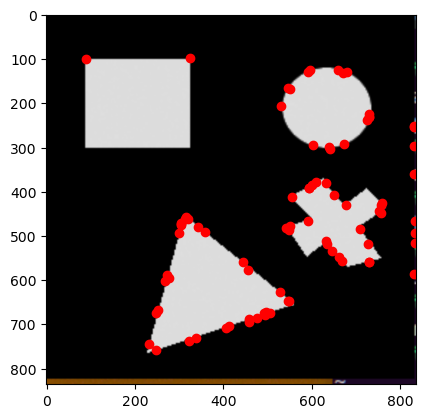

In [134]:
t1=time.time()
corner5=lambdamin(img5,window=5,q=0.9998)
t2=time.time()
print("the running time for an image of shape",corner5.shape,"is", round(t2-t1,2),"ms" )
plt.imshow(img5,zorder=1)
    
corners_pos = np.argwhere(corner5)
    
plt.scatter(corners_pos[:,1],corners_pos[:,0],zorder=2, c = 'r',marker ='o')

C:\Users\Mohamed Salman\AppData\Local\Temp\ipykernel_13940\3074337019.py:54: ComplexWarning: Casting complex values to real discards the imaginary part
  lambdamat[i,j]=lambdamin


the running time for an image of shape (960, 1280) is 48.83 ms


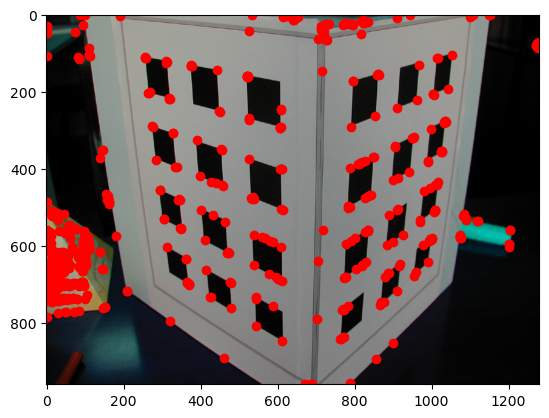

In [135]:
t1=time.time()
corner6=lambdamin(img6,window=3,q=0.9995)
t2=time.time()
print("the running time for an image of shape",corner6.shape,"is", round(t2-t1,2),"ms" )
plt.imshow(img6,zorder=1)
    
corners_pos = np.argwhere(corner6)
    
plt.scatter(corners_pos[:,1],corners_pos[:,0],zorder=2, c = 'r',marker ='o')

In [127]:
%%html
<style>
table {float:left}
</style>

## Here we can see that the algorithm does also well for identfying corners, one notable difference compared to the harris operator is that it seems to detect background corners better than the harris operator, but it also seems prone to error in identfying small edge shifts as corners.

### one improvement could be applying local thresholding instead of quantile non maximum supression

### below is the computation time for different image sizes


| image size | Running time |
| :--- | :--- |
| (353, 454)   | 6.34 s |
| (836, 835) | 26.4 s |
| (960, 1280)   |  48.83 s |
| (447, 728)  | 11.93 s  |
| (200, 256) |  2.16 s|
| (194, 259) | 2.06 s |


 

### we can see that the computations are a lot slower than the harris operator (more than 20X) and that is due the square root calculation over each pixel to find the eigen values, we were also not able to utililze matrix and numpy array operations due to having to calculate the H matrix for every entry which increases complexity by O(n^2). 